In [26]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

In [8]:
class EquationState(TypedDict):
    a:float
    b:float
    c:float
    equ:str
    discriminant:float
    result:str

In [14]:
def show_equation(state:EquationState)->EquationState:
    equ=f"{state['a']}x2 + {state['b']}x + {state['c']}=0"
    return {'equ':equ}

In [4]:
def calc_discriminant(state:EquationState)->EquationState:
    discriminant= state['b']**2 - 4*state['a']*state['c']
    return {'discriminant':discriminant}

In [15]:
def calc_real_roots(state:EquationState)->EquationState:
    root1= (-1*state['b']+ state['discriminant'] **0.5) / 2*state['a']
    root2= (-1*state['b']- state['discriminant'] **0.5) / 2*state['a']
    return {'result':f'The two real roots of equation are {root1} and {root2}'}

In [16]:
def calc_repeated_roots(state:EquationState)->EquationState:
    root=(-1*state['b']) / 2*state['a']
    return {'result':f'The repeated root of equation is {root}'}


In [17]:
def calc_non_real_roots(state:EquationState)->EquationState:
    return {'result':f'The equation do not have any real root.'}

In [28]:
def check_condition(state:EquationState)->Literal["calc_real_roots","calc_repeated_roots","calc_non_real_roots"]:
    if state['discriminant']>0:
        return "calc_real_roots"
    elif state['discriminant']==0:
        return "calc_repeated_roots"
    else:
        return "calc_non_real_roots"

In [29]:
graph=StateGraph(EquationState)

graph.add_node('show_equation',show_equation)
graph.add_node('calc_discriminant',calc_discriminant)
graph.add_node('calc_real_roots',calc_real_roots)
graph.add_node('calc_repeated_roots',calc_repeated_roots)
graph.add_node('calc_non_real_roots',calc_non_real_roots)

graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calc_discriminant')
graph.add_conditional_edges('calc_discriminant',check_condition)
graph.add_edge('calc_real_roots',END)
graph.add_edge('calc_repeated_roots',END)
graph.add_edge('calc_non_real_roots',END)

workflow=graph.compile()


In [33]:
intial_state={'a':2,'b':4,'c':2}
final_state=workflow.invoke(intial_state)
final_state

{'a': 2,
 'b': 4,
 'c': 2,
 'equ': '2x2 + 4x + 2=0',
 'discriminant': 0,
 'result': 'The repeated root of equation is -4.0'}

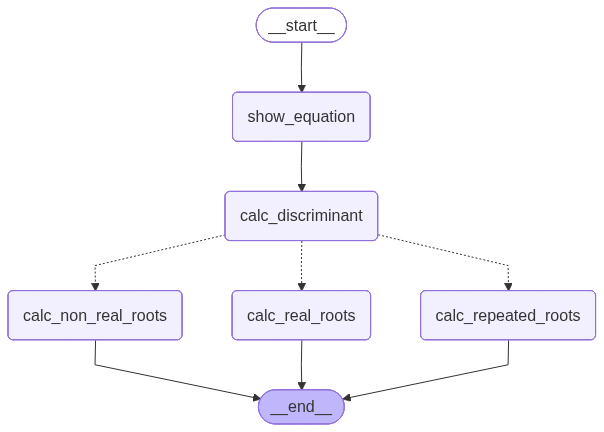

In [30]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())